# Random Forest

In [5]:
import pandas as pd 
import json
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import json

SUMMARY_FILE = 'summary1.json'

def load_summary_data(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)

    metrics = []

    for entry in data["metrics_per_fold"]:
        if "classification_report" in entry:
            classification_report = entry["classification_report"]
            metrics.append({
                "fold": entry.get("fold", None),
                "accuracy": classification_report.get("accuracy", None),
                "precision": classification_report["weighted avg"].get("precision", None),
                "recall": classification_report["weighted avg"].get("recall", None),
                "f1_score": classification_report["weighted avg"].get("f1-score", None),
            })
        elif "average_tree_stats" in entry:
            avg_tree_stats = entry["average_tree_stats"]
            metrics.append({
                "average_tree_depth": avg_tree_stats.get("average_tree_depth", None),
                "average_tree_impurity": avg_tree_stats.get("average_tree_impurity", None),
                "average_tree_size": avg_tree_stats.get("average_tree_size", None),
                "oob_error": avg_tree_stats.get("oob_error", None),
            })

    return pd.DataFrame(metrics)


df_forest = load_summary_data(SUMMARY_FILE)

df_forest.head()


,average_tree_depth,average_tree_impurity,average_tree_size,oob_error,fold,accuracy,precision,recall,f1_score
0,14.93,0.417050,306.44,0.087500,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,0.920000,0.921527,0.920000,0.918865
2,14.79,0.417182,302.74,0.093333,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,0.903333,0.907495,0.903333,0.903155
4,14.84,0.414618,301.64,0.089167,NaN,NaN,NaN,NaN,NaN


# gráficos de desempenho por fold

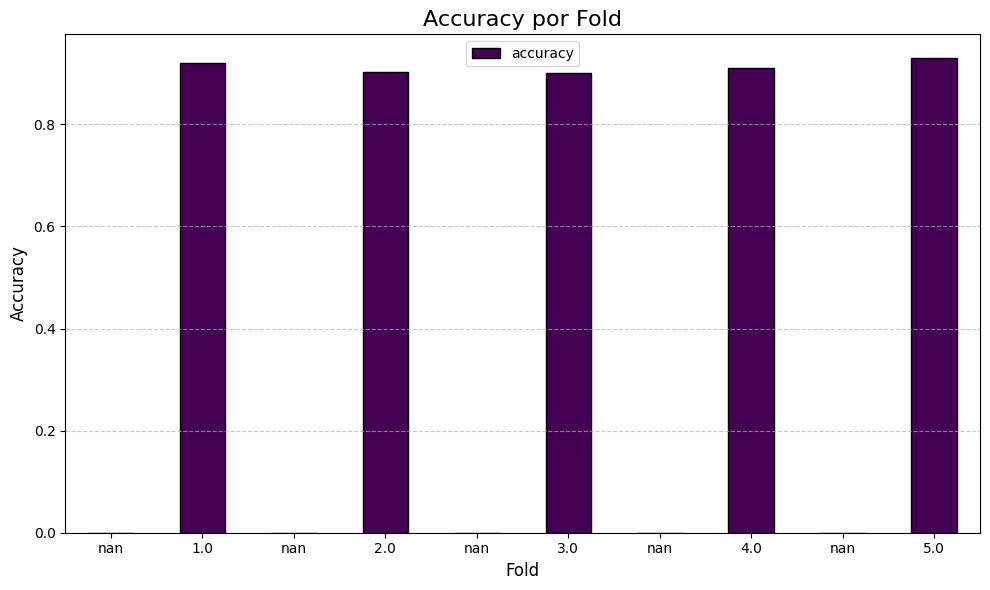

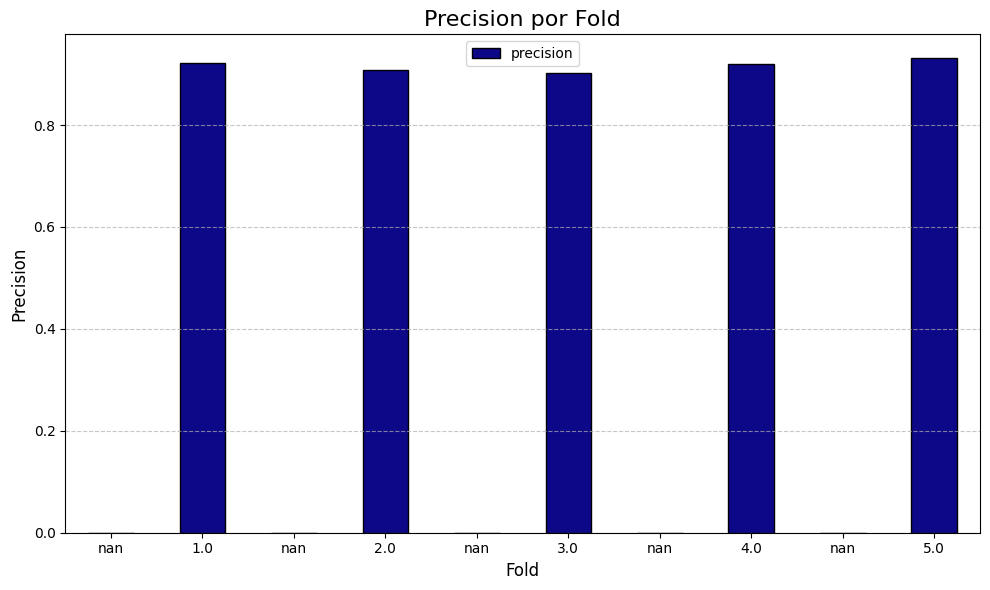

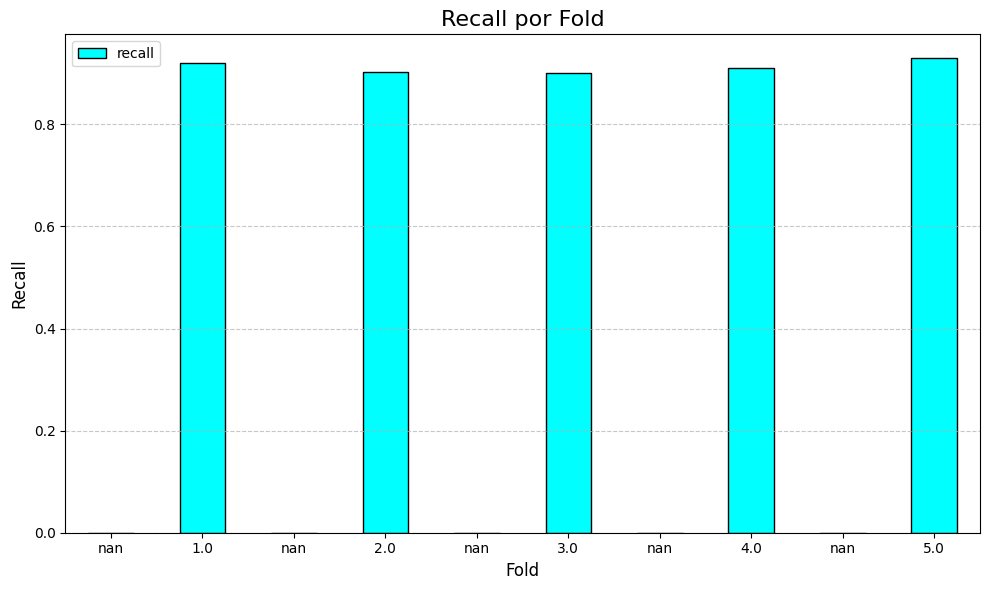

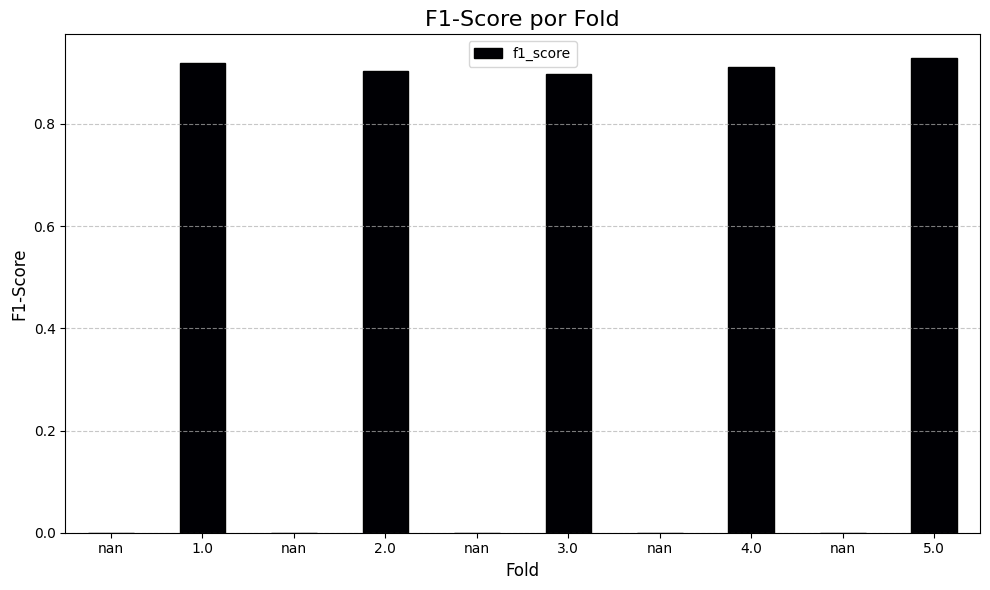

In [17]:


# Gráfico para Accuracy
df_accuracy = df_forest[["fold", "accuracy"]].set_index("fold")
df_accuracy.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("Accuracy por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico para Precision
df_precision = df_forest[["fold", "precision"]].set_index("fold")
df_precision.plot(kind="bar", figsize=(10, 6), colormap="plasma", edgecolor="black")
plt.title("Precision por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico para Recall
df_recall = df_forest[["fold", "recall"]].set_index("fold")
df_recall.plot(kind="bar", figsize=(10, 6), colormap="cool", edgecolor="black")
plt.title("Recall por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico para F1-Score
df_f1_score = df_forest[["fold", "f1_score"]].set_index("fold")
df_f1_score.plot(kind="bar", figsize=(10, 6), colormap="magma", edgecolor="black")
plt.title("F1-Score por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# AVG tree

<Figure size 1000x600 with 0 Axes>

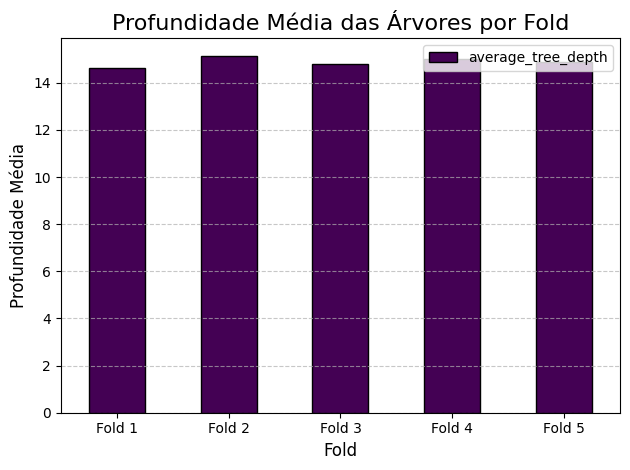

<Figure size 1000x600 with 0 Axes>

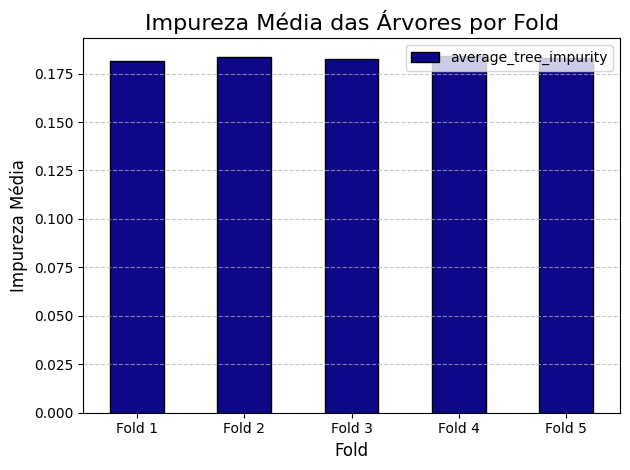

<Figure size 1000x600 with 0 Axes>

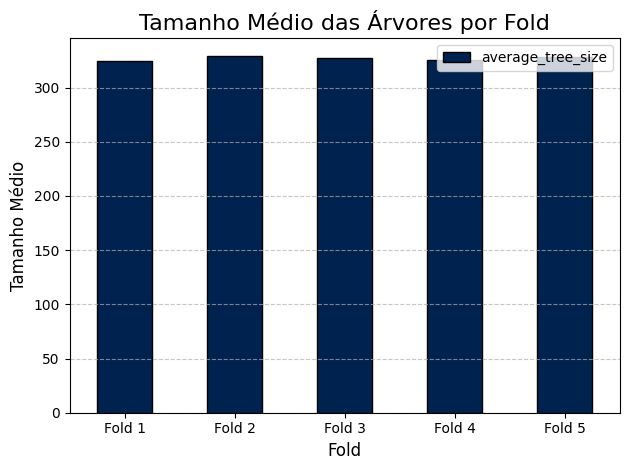

<Figure size 1000x600 with 0 Axes>

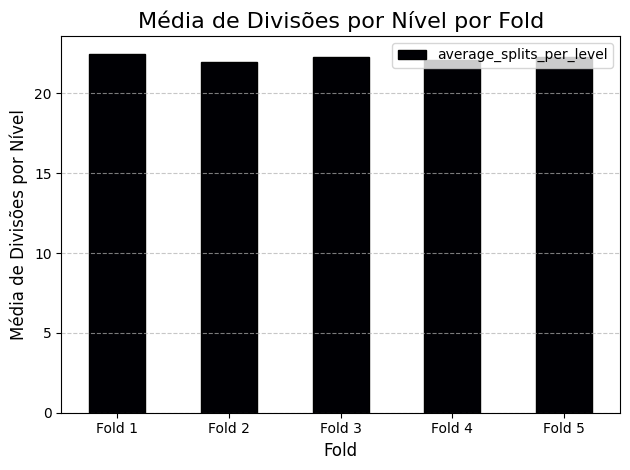

<Figure size 1000x600 with 0 Axes>

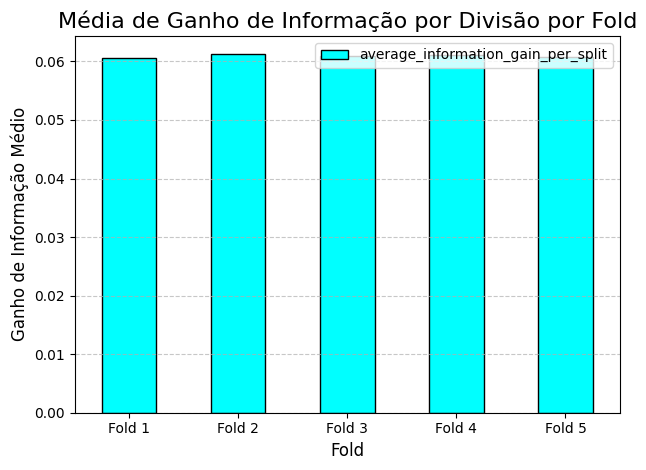

<Figure size 1000x600 with 0 Axes>

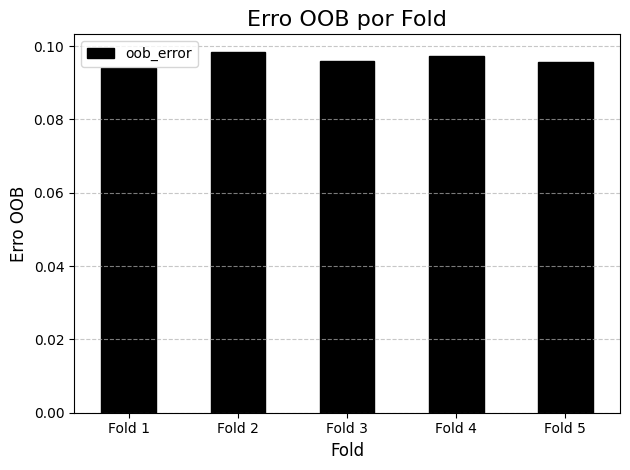

In [ ]:

# avf tree